In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [69]:
# importer le dataset
train_data = pd.read_csv('train_pret.csv')

In [70]:
# afficher l'en tête du dataset
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
# voir la imension du dataset
train_data.shape

(614, 13)

In [72]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [73]:
train_data.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [74]:
(train_data.isna().sum()*100)/614

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [75]:
# analyser la variable Credit_History pour voir comment remplacer les valeurs manquantes ou les supprimer
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [76]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [77]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [78]:
df = train_data.copy()

In [79]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [80]:
df.dropna(inplace=True)

In [81]:
df.shape

(480, 13)

In [82]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [83]:
# supprimer la colonne Loan_ID car elle est d'aucune utiliter ici
df.drop('Loan_ID',axis=1, inplace=True)

In [84]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# Etude des Variables

In [85]:
df['Property_Area']=train_data['Property_Area']

In [86]:
df['Dependents']= df['Dependents'].map({'1':1, '0':0, '2':2, '3+':3})

In [87]:
df.Dependents.unique()
df['Property_Area']= df['Property_Area'].map({'Urban':1, 'Rural':0, 'Semiurban':2})

In [88]:
df['Property_Area'] = train_data['Property_Area']
df['Property_Area']= df['Property_Area'].map({'Urban':1, 'Rural':0})

In [89]:
df['Gender']= df['Gender'].map({'Male':1, 'Female':0})
df['Married']= df['Married'].map({'Yes':1, 'No':0})
df['Education']= df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed']= df['Self_Employed'].map({'Yes':1, 'No':0})

df['Loan_Status']= df['Loan_Status'].map({'Y':1, 'N':0})


In [90]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1.0,1


<AxesSubplot:>

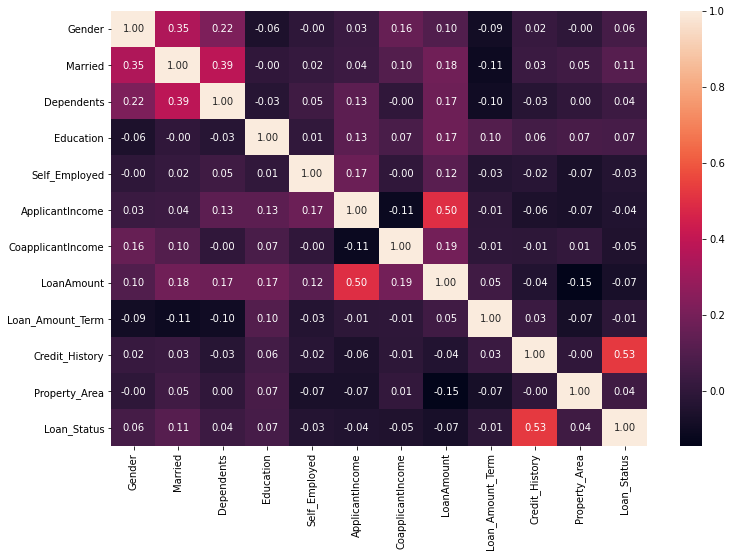

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, fmt= '.2f')

In [92]:
df.drop(['Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome','Self_Employed','Property_Area'],axis=1, inplace=True)

In [93]:
df.head()

,Gender,Married,Dependents,Education,Credit_History,Loan_Status
1,1,1,1,1,1.0,0
2,1,1,0,1,1.0,1
3,1,1,0,0,1.0,1
4,1,0,0,1,1.0,1
5,1,1,2,1,1.0,1


In [94]:
df.isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Credit_History    0
Loan_Status       0
dtype: int64

In [95]:
X = df.drop('Loan_Status', axis=1)
y= df['Loan_Status']

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report , accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier

In [100]:
pole = PolynomialFeatures(degree=2)

In [101]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.2)

In [102]:
X

,Gender,Married,Dependents,Education,Credit_History
1,1,1,1,1,1.0
2,1,1,0,1,1.0
3,1,1,0,0,1.0
4,1,0,0,1,1.0
5,1,1,2,1,1.0
...,...,...,...,...,...
609,0,0,0,1,1.0
610,1,1,3,1,1.0
611,1,1,1,1,1.0
612,1,1,2,1,1.0


In [103]:
y_train

256    0
368    1
179    0
459    0
192    0
      ..
454    1
288    1
17     0
514    0
32     0
Name: Loan_Status, Length: 384, dtype: int64

In [106]:
pole.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [107]:
pole.transform(X_train)

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [108]:
pole.transform(X_val)

array([[1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]])

In [111]:
model= RandomForestClassifier(n_estimators=1000)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
y_pred = model.predict(X_val)

confusion_matrix(y_val, y_pred)

array([[16, 20],
       [ 7, 53]])

In [113]:
accuracy_score(y_val, y_pred)

0.71875

In [114]:
model1= DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [115]:
y_pred1 = model1.predict(X_val)

confusion_matrix(y_val, y_pred1)

array([[18, 18],
       [11, 49]])

In [121]:
accuracy_score(y_val, y_pred1)

0.6979166666666666

In [117]:
model2= SVC()
model2.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [118]:
y_pred2 = model2.predict(X_val)
print('accuracy: ',accuracy_score(y_val, y_pred2))
confusion_matrix(y_val, y_pred2)

accuracy:  0.7708333333333334


array([[14, 22],
       [ 0, 60]])

In [109]:
model5 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model5.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [110]:
y_pred5 = model5.predict(X_val)

In [111]:
confusion_matrix(y_val, y_pred5)

array([[11, 17],
       [ 1, 67]])

In [112]:
accuracy_score(y_val, y_pred5)

0.8125

In [113]:
import pickle
from joblib import dump, load
with open('neural_pred.pkl', 'wb') as model_file:
  pickle.dump(model5, model_file)

In [148]:
test_data = pd.read_csv('test_pret.csv')

In [149]:
len(test_data)

367

In [150]:
test_index = test_data['Loan_ID']

In [151]:
# Prediction de data set du test mais avant le transformer avec cette fonction
def transf_test(df):
    df.drop(['Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome','Dependents','Loan_ID','Property_Area']
            ,axis=1,inplace=True)


    # Transformer le type des variable object en category
    cols =['Gender','Married', 'Education','Self_Employed','Credit_History']

    for c in cols:
        df[c] =df[c].astype('category')

   
    
    return X

In [152]:
test_data = transf_test(test_data)

In [153]:
test_data.head()

,Gender,Married,Dependents,Education,Credit_History
1,1,1,1,1,1.0
2,1,1,0,1,1.0
3,1,1,0,0,1.0
4,1,0,0,1,1.0
5,1,1,2,1,1.0


In [141]:
pole.fit(test_data)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [142]:
pole.transform(test_data)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [154]:
classifier5 = load('neural_pred.pkl')

In [155]:
y_test5= classifier5.predict(test_data)

In [156]:
y_test5

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [157]:
len(y_test5)

480

In [134]:
len(test_index)

367

In [132]:
d = {'Loan_ID': test_index ,'Loan_Status': y_test5}
df = pd.DataFrame(data=d)

ValueError: array length 480 does not match index length 367